In [1]:
import pandas as pd

In [2]:
#  read individual datasets
dist_sales = pd.read_csv("distributor_sales.csv",index_col=0)
cma = pd.read_csv("cma.csv",index_col=0)
direct_sales = pd.read_csv("direct_sales.csv",index_col=0)
#customer = pd.read_csv("customer.csv",index_col=0)
part = pd.read_csv("part.csv",index_col=0)
dist_inv = pd.read_csv("distributor_inventory.csv",index_col=0)
customer = pd.read_csv('wharton_customer_extract_latest.txt', sep="\t", header=None)
customer.columns = [
  "customer_id",
  "customer_region",
  "customer_country_code",
  "customer_country_name",
  "customer_postal_code",
  "customer_worldwide_account_number",
  "customer_distributor_indicator",
  "customer_type_description",
  "customer_industry_business_code_label_level_1",
  "customer_industry_business_code_label_level_2",
    "customer_industry_business_code_label_level_3",
  "customer_industry_label_level_1",
  "customer_industry_label_level_2",
  "customer_industry_label_level_3",
  "customer_industry_label_level_4",
  "customer_subcontractor_indicato",
  "tier2_distributor_classification_name"
]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## explore parts, extract BU info, var of interest “product_owning_business_unit_name”

In [3]:
print(part.shape)
print(part.columns)

(300000, 27)
Index(['te_corporate_part_number', 'part_description',
       'part_material_type_name', 'part_engineering_status_name',
       'part_discontinuance_status_name', 'part_sales_status_name',
       'part_record_original_date', 'part_marketing_brand_name',
       'part_promote_indicator', 'part_base_cpr_unit_of_measure_label',
       'product_classification_name', 'product_naics_name',
       'product_structure_label_level_1', 'product_structure_label_level_2',
       'product_structure_label_level_3', 'product_structure_label_level_4',
       'product_structure_label_level_5', 'product_family_label_level_1',
       'product_family_label_level_2', 'product_family_label_level_3',
       'product_line_label', 'product_code_label',
       'product_owning_segment_name',
       'product_owning_business_unit_group_name',
       'product_owning_business_unit_name',
       'product_owning_profit_center_group_name',
       'product_owning_profit_center_name'],
      dtype='object')


In [4]:
part.head()

,te_corporate_part_number,part_description,part_material_type_name,part_engineering_status_name,part_discontinuance_status_name,part_sales_status_name,part_record_original_date,part_marketing_brand_name,part_promote_indicator,part_base_cpr_unit_of_measure_label,...,product_family_label_level_1,product_family_label_level_2,product_family_label_level_3,product_line_label,product_code_label,product_owning_segment_name,product_owning_business_unit_group_name,product_owning_business_unit_name,product_owning_profit_center_group_name,product_owning_profit_center_name
0,E24076-005,SXSU-4151,FINISHED PRODUCT,PRODUCTION,NOT PLANNED,GENERAL SALES,2011-08-24,Raychem,1,PIECE (PC),...,Heat Shrink Tubing (H),Heat Shrink Tubing (H1),Heat Shrink Tubing (H11),Heatshrink Medium Voltage Joints (752),"MVJ INL PL,EL 15,12,17.5KV (C795)",Industrial Solutions,Energy,Energy,Energy,Energy / Power & Utility
1,E33170-013,RSES-5224-P,FINISHED PRODUCT,PRODUCTION,NOT PLANNED,GENERAL SALES,2011-08-24,Raychem,0,PIECE (PC),...,Connector Systems (A),Miscellaneous Connectors (AE),Miscellaneous Connectors (AE1),Switchgear Connection System (758),SCREENED ELBOW ADAPTER 2XXA (C808),Industrial Solutions,Energy,Energy,Energy,Energy / Power & Utility
2,E37675-064,POLT-24D/3XOH1-L12A,FINISHED PRODUCT,PRODUCTION,NOT PLANNED,GENERAL SALES,2011-08-24,Raychem,1,PIECE (PC),...,Heat Shrink Tubing (H),Heat Shrink Tubing (H1),Heat Shrink Tubing (H11),Heatshrink MV Terminations (753),"MVT PL OUTD 25,24 KV (C542)",Industrial Solutions,Energy,Energy,Energy,Energy / Power & Utility
3,E45332-064,EMKT-6O/50-95,FINISHED PRODUCT,PRODUCTION,NOT PLANNED,GENERAL SALES,2011-08-24,Raychem,0,PIECE (PC),...,Heat Shrink Tubing (H),Heat Shrink Tubing (H1),Heat Shrink Tubing (H11),Heatshrink MV Terminations (753),MVT FLEX IND/OUTD (C555),Industrial Solutions,Energy,Energy,Energy,Energy / Power & Utility
4,E59032-072,POLT-12B/3XIH1,FINISHED PRODUCT,PRODUCTION,NOT PLANNED,GENERAL SALES,2011-08-24,Raychem,0,PIECE (PC),...,Heat Shrink Tubing (H),Heat Shrink Tubing (H1),Heat Shrink Tubing (H11),Heatshrink MV Terminations (753),"MVT PL IND 15,12,17.5 KV (C538)",Industrial Solutions,Energy,Energy,Energy,Energy / Power & Utility


In [7]:
print(part.product_owning_business_unit_name.nunique())
part.product_owning_business_unit_name.unique()

24


array(['Energy', 'IND Systems', 'A&D Connectors', 'Data and Devices',
       'Automotive', 'A&D Wire and Cable', 'Appliances',
       'Application Tooling', 'Commercial & Industrial Vehicles',
       'A&D Engineered Polymer Solutions', 'IND Devices',
       'Medical : Surgical & Cables', 'Hybrid Electric Mobility Solutions',
       'A&D Ruggedized Fiber Optics', 'Sensors - Automotive',
       'A&D High Performance Group', 'A&D Value Added Products',
       'Marine, Oil and Gas', 'Deutsch Industrial Vehicles',
       'Deutsch Offshore', 'Hirschmann Car Communication', 'TE Sensors',
       'Interventional', 'Jaquet Technologies', nan], dtype=object)

## Generate heat map; BU vs Region

In [8]:
direct_sales.nlargest(5, 'sales_amount')[['customer_id', 'sales_quantity', 'sales_amount']]

,customer_id,sales_quantity,sales_amount
1128377,L:1:3201894,0.0,4176856.95
4714334,N:279:99999999:US,0.0,3672194.32
2236129,L:258:FLE005-01,2472000.0,3654455.33
2590445,L:258:FLE005-01,1998000.0,3563812.31
4103147,L:1:1246176,2400000.0,3316648.88


In [11]:
# join parts and direct sales
direct_sales_part_joined_df = direct_sales.merge(
    part, how='inner', on=['te_corporate_part_number'])

In [19]:
#join customer 
direct_sales_customer_joined_df = direct_sales_part_joined_df.merge(
    customer, how='inner', on=['customer_id'])

direct_sales_customer_joined_df = direct_sales_customer_joined_df[
    direct_sales_customer_joined_df['fiscal_year_historical'] == 2018]

In [ ]:
bu_region_total_sales_df = direct_sales_customer_joined_df.groupby(
    ['customer_region', '']).agg({'sales_amount': 'sum'})

#temp_df = bu_region_total_sales_df.nlargest(5, 'sales_amount')
bu_region_total_sales_df = bu_region_total_sales_df.reset_index()
bu_region_total_sales_df = bu_region_total_sales_df.pivot(index='customer_region',
                                                          columns='customer_industry_business_code_label_level_1', 
                                                          values='sales_amount')
bu_region_total_sales_df

In [24]:
direct_sales_customer_joined_df.head()

,customer_id,te_corporate_part_number,fiscal_year_historical,fiscal_quarter_historical,fiscal_month_historical,fiscal_month_end_date_historical,fiscal_month_begin_date_converted_historical,fiscal_month_week_count,pricing_agreement_indicator,sales_quantity,...,customer_type_description,customer_industry_business_code_label_level_1,customer_industry_business_code_label_level_2,customer_industry_business_code_label_level_3,customer_industry_label_level_1,customer_industry_label_level_2,customer_industry_label_level_3,customer_industry_label_level_4,customer_subcontractor_indicato,tier2_distributor_classification_name
2,L:1:1306969,1618002-7,2018,3,9,2018-06-29,2018-06-01,4.0,No,250.0,...,Listed account,Distribution Channel (071),Electronic (074),Electronic-General&Other (076),Wholesale & Retail Trade (0551),Wholesalers (0564),Catalog Distributors (0568),Catalog Distributors (RB41),No,High Service
3,L:1:1306969,1618002-7,2018,4,11,2018-08-31,2018-08-01,5.0,No,500.0,...,Listed account,Distribution Channel (071),Electronic (074),Electronic-General&Other (076),Wholesale & Retail Trade (0551),Wholesalers (0564),Catalog Distributors (0568),Catalog Distributors (RB41),No,High Service
4,L:1:1306969,1618002-7,2018,2,4,2018-01-26,2018-01-01,4.0,No,499.0,...,Listed account,Distribution Channel (071),Electronic (074),Electronic-General&Other (076),Wholesale & Retail Trade (0551),Wholesalers (0564),Catalog Distributors (0568),Catalog Distributors (RB41),No,High Service
5,L:1:1306969,605980-2,2018,4,11,2018-08-31,2018-08-01,5.0,No,25.0,...,Listed account,Distribution Channel (071),Electronic (074),Electronic-General&Other (076),Wholesale & Retail Trade (0551),Wholesalers (0564),Catalog Distributors (0568),Catalog Distributors (RB41),No,High Service
14,L:1:1306969,DT04-3P,2018,4,10,2018-07-27,2018-07-01,4.0,No,12750.0,...,Listed account,Distribution Channel (071),Electronic (074),Electronic-General&Other (076),Wholesale & Retail Trade (0551),Wholesalers (0564),Catalog Distributors (0568),Catalog Distributors (RB41),No,High Service


In [13]:
direct_sales.shape

(5270383, 11)

In [25]:
direct_sales_part_joined_df.shape

(3143650, 37)

In [27]:
direct_sales_customer_joined_df.columns

Index(['customer_id', 'te_corporate_part_number', 'fiscal_year_historical',
       'fiscal_quarter_historical', 'fiscal_month_historical',
       'fiscal_month_end_date_historical',
       'fiscal_month_begin_date_converted_historical',
       'fiscal_month_week_count', 'pricing_agreement_indicator',
       'sales_quantity', 'sales_amount', 'part_description',
       'part_material_type_name', 'part_engineering_status_name',
       'part_discontinuance_status_name', 'part_sales_status_name',
       'part_record_original_date', 'part_marketing_brand_name',
       'part_promote_indicator', 'part_base_cpr_unit_of_measure_label',
       'product_classification_name', 'product_naics_name',
       'product_structure_label_level_1', 'product_structure_label_level_2',
       'product_structure_label_level_3', 'product_structure_label_level_4',
       'product_structure_label_level_5', 'product_family_label_level_1',
       'product_family_label_level_2', 'product_family_label_level_3',
       

In [20]:
bu_region_total_sales_df = direct_sales_customer_joined_df.groupby(
    ['customer_region', 'product_owning_business_unit_name']).agg({'sales_amount': 'sum'})

#temp_df = bu_region_total_sales_df.nlargest(5, 'sales_amount')
bu_region_total_sales_df = bu_region_total_sales_df.reset_index()
bu_region_total_sales_df = bu_region_total_sales_df.pivot(index='customer_region',
                                                          columns='product_owning_business_unit_name', 
                                                          values='sales_amount')
bu_region_total_sales_df

product_owning_business_unit_name,A&D Connectors,A&D Engineered Polymer Solutions,A&D High Performance Group,A&D Ruggedized Fiber Optics,A&D Value Added Products,A&D Wire and Cable,Appliances,Application Tooling,Automotive,Commercial & Industrial Vehicles,...,Hirschmann Car Communication,Hybrid Electric Mobility Solutions,IND Devices,IND Systems,Interventional,Jaquet Technologies,"Marine, Oil and Gas",Medical : Surgical & Cables,Sensors - Automotive,TE Sensors
customer_region,,,,,,,,,,,,,,,,,,,,,
Americas,49665857.88,10221988.02,15488299.01,1059554.55,1302170.80,12970962.12,44617677.12,9993125.57,1.675203e+08,17762281.02,...,NaN,3407899.83,27424513.77,24213794.04,NaN,502283.01,4611229.68,18272860.28,3519049.73,44500913.45
Asia,4799201.97,1936154.82,1429843.63,28422.68,24646.85,3479760.36,53326345.32,1809121.28,2.813004e+08,27117060.89,...,8288.64,18289567.72,27097023.10,15895877.12,NaN,782103.16,561283.01,5753935.01,14075300.82,11854490.51
EMEA,43581272.21,10077743.99,10136308.10,662860.53,5364986.58,9477583.96,32970783.49,6328520.16,3.143103e+08,30280293.47,...,NaN,14061698.73,39450898.27,35712127.66,NaN,992554.84,2685267.24,2558650.51,10924878.64,30255990.35
Japan,1520987.26,618333.79,192937.02,261671.65,404365.37,1512015.35,8405001.53,1116736.23,6.497366e+07,3584951.62,...,19850.89,4384748.11,12022384.94,6071749.21,46667.04,37673.49,20312.49,1997543.52,3441825.17,6536607.17


In [21]:
bu_region_total_sales_df.to_csv("updated_heatmap_data.csv")

In [22]:
import seaborn as sns

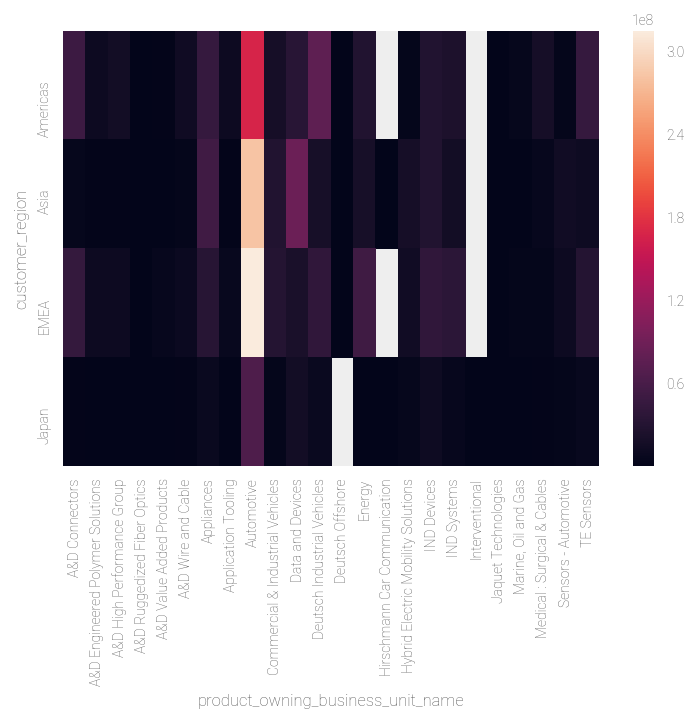

In [23]:
sns.heatmap(bu_region_total_sales_df)